# ***Data Analysis*** ***of Cancellation*** ***of*** ***Bookings***

In recent years, City Hotels and Resort Hotels have seen high cancellation rates.Each hotel is now dealing with number of issues as a result, including fewer revenues and less than ideal hotel room use. Our Primary goal is to increase their efficiency in generating revenues and for us to offer thorough advice to address this problem.
The analysis of hotel booking cancellation as well as other factors that hve no bearing on their business and yearly revenue generation are the main topics of this report.

Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [ ]:
data=pd.read_csv("/content/hotel_bookings 2.csv")

Exploratory Data Analysis(EDA) and Data Cleaning

In [57]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
0                   C                3   No Deposit                    0   
1                   C                4   No Deposit                    0   
2                   C                0   No Deposit                    0   
3                   A                0   No Deposit                    0   
4                   A                0   No Deposit                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 30 columns]

In [ ]:
data.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out                6/9/2017  
119386           Check-Out                7/9/2017  
119387           Check-Out                7/9/2017  
119388           Check-Out                7/9/2017  
119389           Check-Out                7/9/2017  

[5 rows x 32 columns]

In [ ]:
data.shape

(119390, 32)

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Converting "reservation_status_date" data type from object to date as we will need that

In [ ]:
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"],format="%d/%m/%Y")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Data Cleaning

In [ ]:
data.drop(["company","agent"],axis=1, inplace=True)
data.dropna(inplace=True)

In [ ]:
data.isna().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
data.describe(include="object")

hotel arrival_date_month    meal country market_segment  \
count       118898             118898  118898  118898         118898   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         79302              13852   91863   48586          56402   

       distribution_channel reserved_room_type assigned_room_type  \
count                118898             118898             118898   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97730              85601              73863   

       deposit_type customer_type reservation_status  
count        118898        118898             118898  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104163         89174              74745

Printing all unique values

In [ ]:
for col in data.describe(include="object").columns:
     print(col)
     print(data[col].unique())
     print('*' * 50)

hotel
['Resort Hotel' 'City Hotel']
**************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

Removing the outliers

In [70]:
data["adr"].plot(kind="box")

<Axes: >

In [71]:
data["adr"]=data[data["adr"]<400]["adr"]

<Axes: >

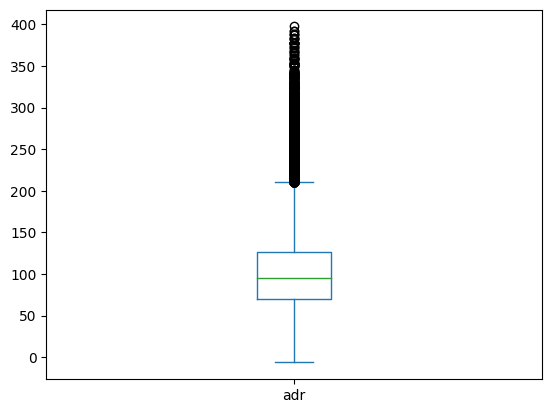

In [62]:
data["adr"].plot(kind="box")

In [63]:
data.describe()                #adr values which are outliers are removed

is_canceled      lead_time  arrival_date_year  \
count  118890.000000  118890.000000      118890.000000   
mean        0.371352     104.312659        2016.157633   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.483168     106.902609           0.707453   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118890.000000              118890.000000   
mean                  27.166347                  15.801001   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   
std                   13.590108                   8.780232   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118890.000000         118890.000000  118890.000000   
mean                  0.928867              2.502086       1.858382   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      55.000000   
std                   0.996184              1.900055       0.578579   

            children         babies  is_repeated_guest  \
count  118890.000000  118890.000000      118890.000000   
mean        0.104155       0.007949           0.032004   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   
std         0.399063       0.097383           0.176012   

       previous_cancellations  previous_bookings_not_canceled  \
count           118890.000000                   118890.000000   
mean                 0.087148                        0.131634   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   
std                  0.845897                        1.484719   

       booking_changes  days_in_waiting_list            adr  \
count    118890.000000         118890.000000  118890.000000   
mean          0.221154              2.330911     101.937899   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      70.000000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000     397.380000   
std           0.652774             17.631035      48.015408   

       required_car_parking_spaces  total_of_special_requests  \
count                118890.000000              118890.000000   
mean                      0.061881                   0.571663   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   
std                       0.244165                   0.792622   

             reservation

Data Analysis and Visualization


Plot the Cancelled and not Cancelled boookings

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64


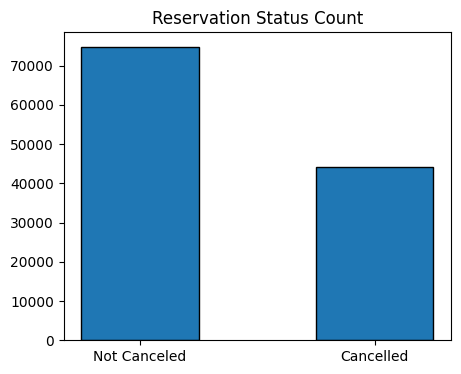

In [76]:
cancelled_perc=data["is_canceled"].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))

# Add title and labels
plt.title("Reservation Status Count")
plt.bar(["Not Canceled","Cancelled"],data["is_canceled"].value_counts(),edgecolor="k",width=0.5)

plt.show()

Plot reservation status in different hotels

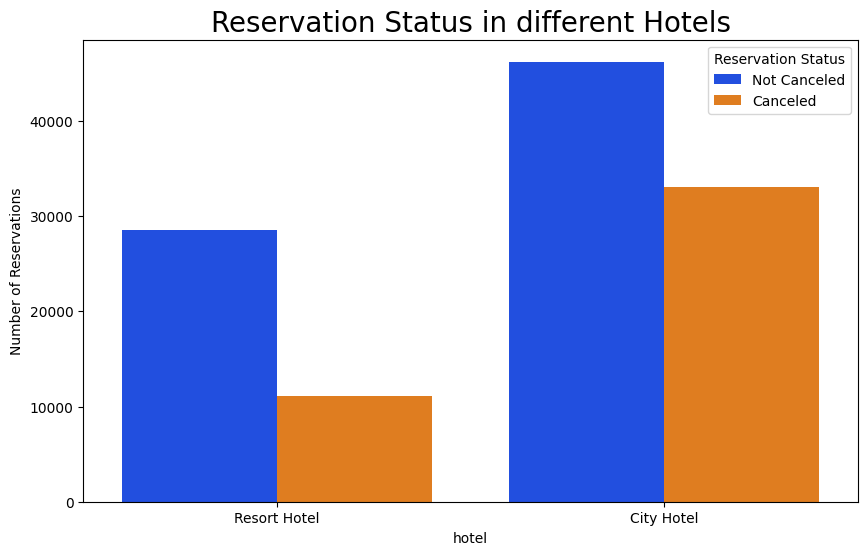

In [77]:

plt.figure(figsize=(10,6))

# Create the countplot
ax1=sns.countplot(x="hotel", hue="is_canceled",data=data, palette="bright")

# Add title and labels
plt.title("Reservation Status in different Hotels",size=20)
plt.xlabel("hotel")
plt.ylabel("Number of Reservations")
# Set legend labels
legend_labels,legend_handles=ax1. get_legend_handles_labels()
if legend_handles:
    ax1.legend(["Not Canceled", "Canceled"], title="Reservation Status",
               bbox_to_anchor=(1,1), fontsize=10)
# Display the plot
plt.show()

In [78]:
Resort_Hotel=data[data["hotel"]=="Resort Hotel"]
Resort_Hotel["is_canceled"].value_counts(normalize=True)


is_canceled
0    0.720265
1    0.279735
Name: proportion, dtype: float64

In [79]:
City_Hotel=data[data["hotel"]=="City Hotel"]
City_Hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.582908
1    0.417092
Name: proportion, dtype: float64

Group by reservation status and adr and then visualize it

In [80]:
Resort_Hotel=Resort_Hotel.groupby("reservation_status_date")[["adr"]].mean()
City_Hotel=City_Hotel.groupby("reservation_status_date")[["adr"]].mean()


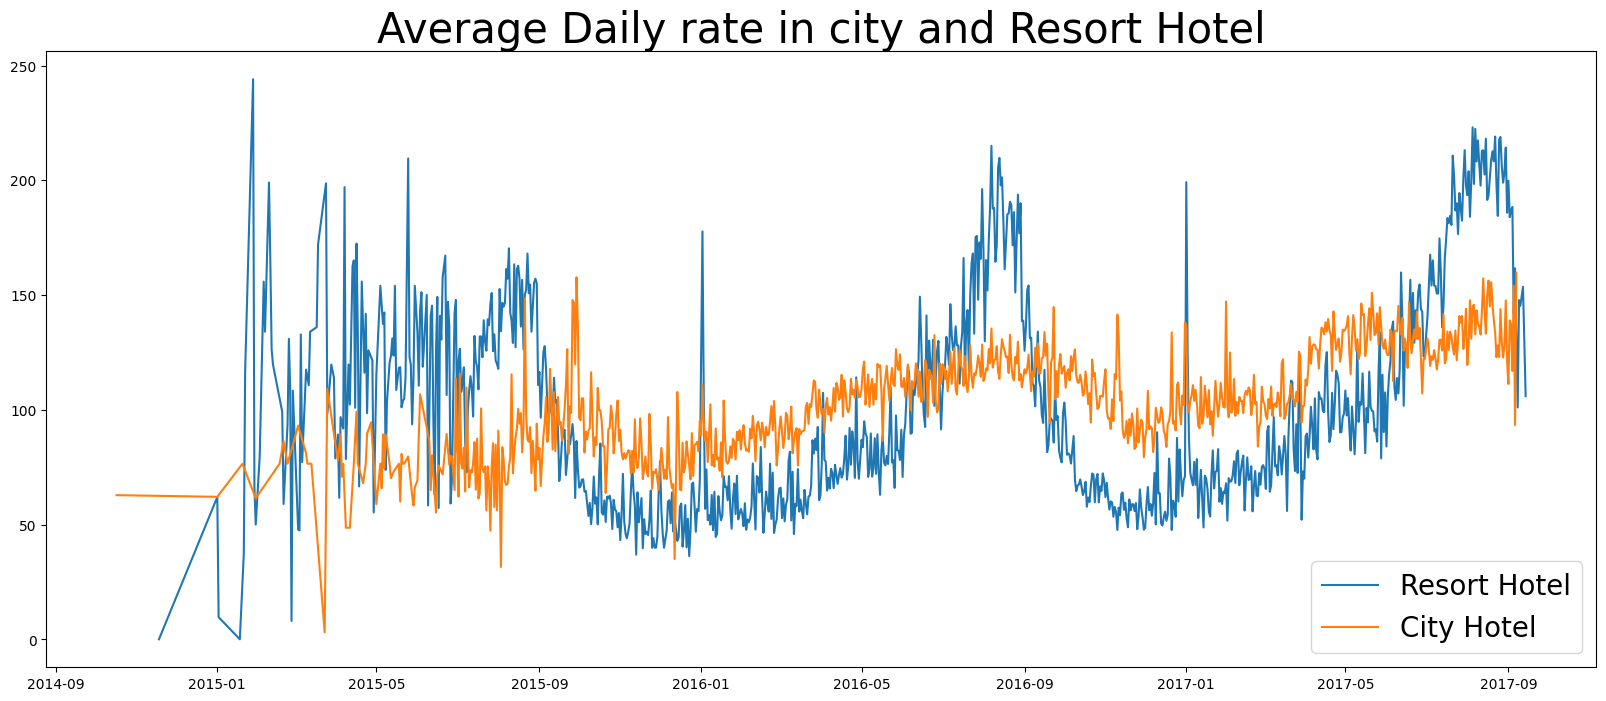

In [81]:
plt.figure(figsize=(20,8))
plt.title("Average Daily rate in city and Resort Hotel", size=30)
plt.plot(Resort_Hotel.index,Resort_Hotel["adr"],label="Resort Hotel")
plt.plot(City_Hotel.index,City_Hotel["adr"],label="City Hotel")
plt.legend(fontsize=20)
plt.show()


Convert reservation_status_date to month and then visualize Reservation status per Month

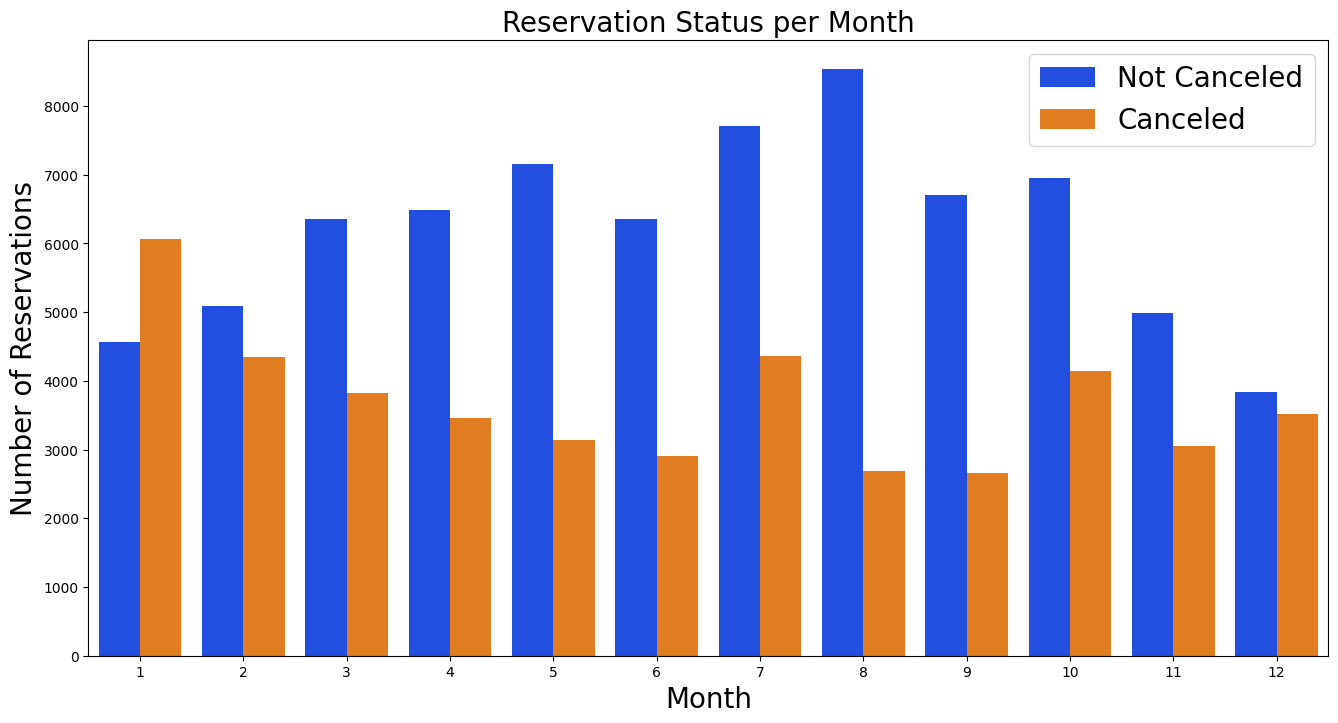

In [88]:
data["month"]=data["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x="month",hue="is_canceled",data=data, palette="bright")
legend_labels,_=ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status per Month",fontsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Number of Reservations",fontsize=20)
plt.legend(["Not Canceled","Canceled"],fontsize=20)
plt.show()

Plot ADR with respect to months

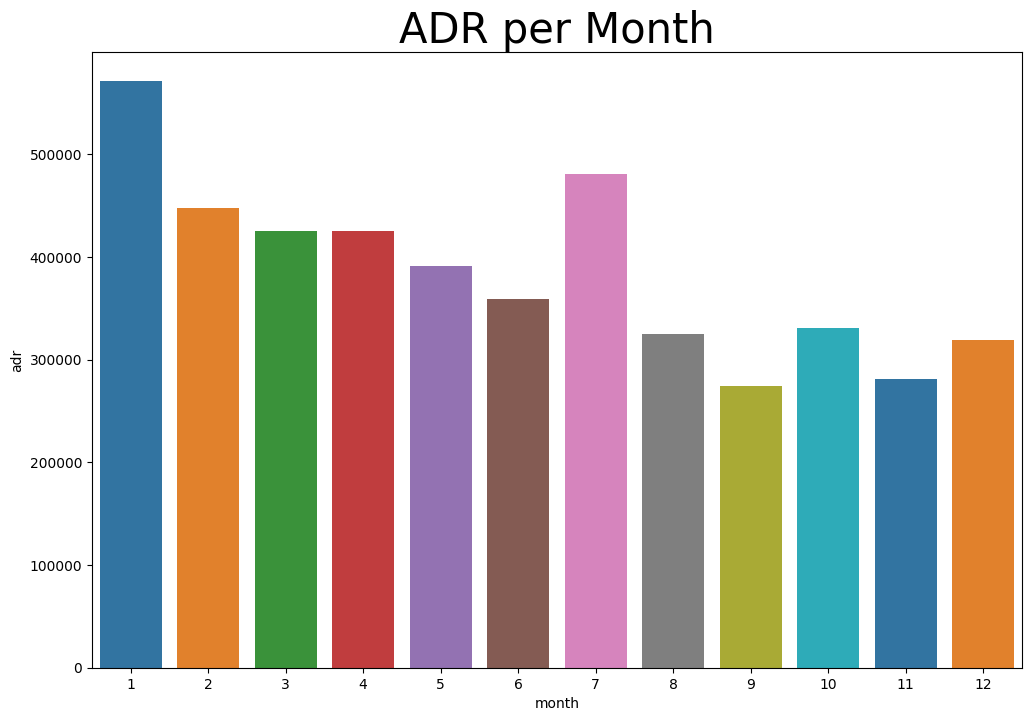

In [ ]:

plt.figure(figsize=(12, 8))
plt.title("ADR per Month", fontsize=30)
sns.barplot(
    x="month",
    y="adr",
    data=data[data["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index(),
    palette="tab10"
)

plt.show()

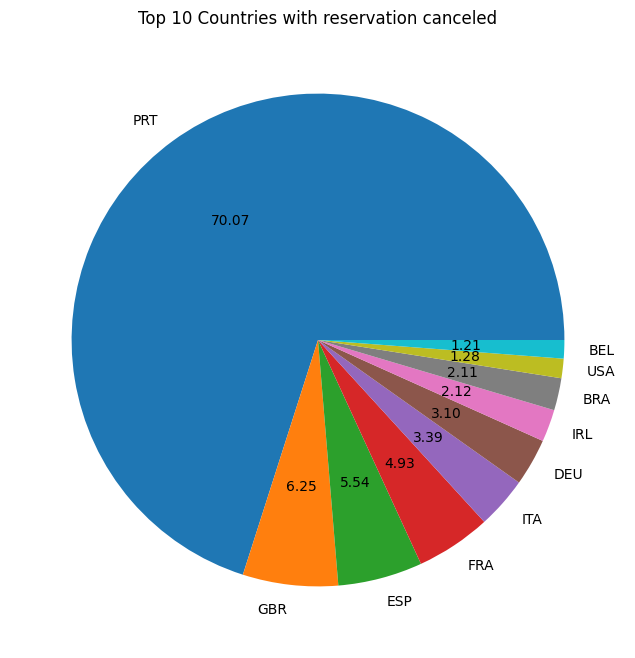

In [89]:
Cancelled_data=data[data["is_canceled"]==1]
Top_10_Countries=Cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(16,8))
plt.title("Top 10 Countries with reservation canceled")
plt.pie(Top_10_Countries, autopct="%.2f", labels=Top_10_Countries.index)
plt.show()



In [ ]:
data["market_segment"].value_counts()

In [ ]:
data["market_segment"].value_counts(normalize=True)   # Percentage of all market segment

In [ ]:
Cancelled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.469694
Groups           0.273998
Offline TA/TO    0.187475
Direct           0.043465
Corporate        0.022152
Complementary    0.002039
Aviation         0.001178
Name: proportion, dtype: float64

In [ ]:
not_Cancelled_data=data[data["is_canceled"]==0]
print(not_Cancelled_data)                             #Printed not cancelled reservations

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

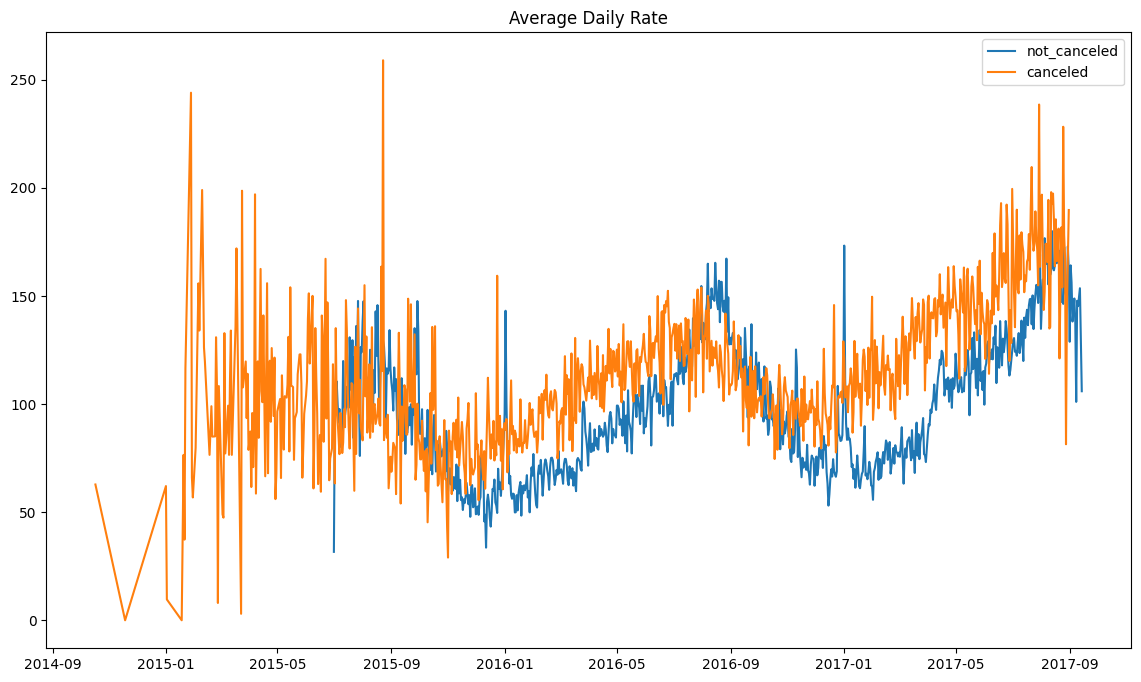

In [ ]:

Cancelled_data_adr=Cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
Cancelled_data_adr.reset_index(inplace=True)
Cancelled_data_adr.sort_values("reservation_status_date",inplace=True)

not_Cancelled_data_adr=not_Cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_Cancelled_data_adr.reset_index(inplace=True)
not_Cancelled_data_adr.sort_values("reservation_status_date",inplace=True)

#Plotting Average Daily Rate
plt.figure(figsize=(14,8))
plt.title("Average Daily Rate")
plt.plot(not_Cancelled_data_adr["reservation_status_date"],not_Cancelled_data_adr["adr"], label="not_canceled")
plt.plot(Cancelled_data_adr["reservation_status_date"],Cancelled_data_adr["adr"], label="canceled")
plt.legend()
plt.show()